In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import pandas as pd
from matplotlib import cm
import seaborn as sns
import csv
from math import *
import datetime as dt
import matplotlib.dates as mdates
import statistics
import scipy as scipy
import calplot 
import calmap
import matplotlib as mpl

In [3]:
#Settings

pd.set_option('display.max_rows', 1000)
pd.set_option('display.expand_frame_repr', False)

In [10]:
#DO NOT TOUCH HEADER
#Modify body to adjust query
header = {'x-functions-key': 'P8gCa4DlO122l7gQ9ICTJ/TqAua8lSUWxT4OJ783k4LonbQpcD7e4A=='}
#Pollutant Request
body1 = {
    "queries": [
    {
      "datasourceId": 1,
    
      "pollutantIds": [
        1,2,3,4,5,6,7,8,9,42
      ],
      "sensorIds": [
        1
      ],
      "startDate": "20220201T08:00",
      "endDate": "20230131T07:55"
    }
  ],
  "format": "json"
}
#Met Data Request
#Not Working Yet. Met Data interferes with TSI calculation
body2 = {
    "queries": [
    {
      "datasourceId": 1,
    
      "attributeIds": [
        3,4
      ],
      "sensorIds": [
        1
      ],
      "startDate": "20220201T08:00",
      "endDate": "20230201T08:00"
    }
  ],
  "format": "json"
}

In [46]:
#Pollutants
Dump1 = requests.post('https://beta-awba-sensor-data-api.azurewebsites.net/api/query', json=body1, headers=header)
#Wind
Dump2 = requests.post('https://beta-awba-sensor-data-api.azurewebsites.net/api/query', json=body2, headers=header)

In [47]:
#Reading Json dump
parse_Json = json.loads(Dump1.text)
parse_Json1 = json.loads(Dump2.text)
y = parse_Json['results'][0]['data'][0]['pollutantMeasurements']
y1 = parse_Json1['results'][0]['data'][0]['attributeMeasurements']

In [ ]:
print(parse_Json)

In [48]:
#Creates the different lists needed to store each pollutant's information to then be converted into the dataframe.
BZdates = []
BZmeasures = []
BCdates = []
BCmeasures = []
EtBzdates = []
EtBzmeasures = []
O3dates = []
O3measures = []
P1dates = []
P1measures = []
P25dates = []
P25measures = []
P10dates = []
P10measures = []
S2dates = []
S2measures = []
TOdates = []
TOmeasures = []
PXdates = []
PXmeasures = []
WndSpd = []
SpdT = []
DirT = []
WndDir = []

In [49]:
#Passing value and date data from pollutantMeasurements to their dictionaries
for i in y:
    if i['abbreviation'] == 'Bz':
        BZdates.append(i['sampleDate'])
        BZmeasures.append(i['value'])

    elif i['abbreviation'] == 'Bc':
        BCdates.append(i['sampleDate'])
        BCmeasures.append(i['value'])

    elif i['abbreviation'] == 'EthBz':
        EtBzdates.append(i['sampleDate'])
        EtBzmeasures.append(i['value'])

    elif i['abbreviation'] == 'O3':
        O3dates.append(i['sampleDate'])
        O3measures.append(i['value'])

    elif i['abbreviation'] == 'pm1':
        P1dates.append(i['sampleDate'])
        P1measures.append(i['value'])
    
    elif i['abbreviation'] == 'pm10':
        P10dates.append(i['sampleDate'])
        P10measures.append(i['value'])

    elif i['abbreviation'] == 'pm2.5':
        P25dates.append(i['sampleDate'])
        P25measures.append(i['value'])
    
    elif i['abbreviation'] == 'SO2':
        S2dates.append(i['sampleDate'])
        S2measures.append(i['value'])
    
    elif i['abbreviation'] == 'Tol':
        TOdates.append(i['sampleDate'])
        TOmeasures.append(i['value'])
    
    elif i['abbreviation'] == 'Xyl':
        PXdates.append(i['sampleDate'])
        PXmeasures.append(i['value'])

In [50]:
for i in y1:
    if i['abbreviation'] == 'WndDir':
        DirT.append(i['sampleDate'])
        WndDir.append(i['value'])
    elif i['abbreviation'] == 'WndSpd':
        SpdT.append(i['sampleDate'])
        WndSpd.append(i['value'])
        


In [51]:
#Declare the dataframe.
df = pd.DataFrame()
#Windframe
dfw = pd.DataFrame()

In [52]:
#Append the complete lists, as columns, to the dataframe.
df['Time'] = P25dates
df['Bz'] = pd.Series(BZmeasures)
df['Bc'] = pd.Series(BCmeasures)
df['EtBz'] = pd.Series(EtBzmeasures)
df['O3'] = pd.Series(O3measures)
df['PM1'] = pd.Series(P1measures)
df['PM2.5'] = pd.Series(P25measures)
df['PM10'] = pd.Series(P10measures)
df['SO2'] = pd.Series(S2measures)
df['To'] = pd.Series(TOmeasures)
df['Xyl'] = pd.Series(PXmeasures)
dfw['Time'] = pd.Series(DirT)
dfw['Speed'] = pd.Series(WndSpd)
dfw['Direction'] = pd.Series(WndDir)


In [53]:
#Converting the datetime to a more readable format. Splitting the month and hour into seperate columns to work on them with
df['DateTime'] = df['Time'].str.split('.').str[0]

df['DateTime'] = df['DateTime'].str.replace('T',' ')
df['DateTime'] = df['DateTime'].str.replace('Z','')
df['Day'] = df['DateTime'].str.split(' ').str[0]
df['Hour'] = df['DateTime'].str.split(' ').str[1]
df['Hour'] = df['Hour'].str.split(':').str[0]
df['Month'] = df['Day'].str.split('-').str[1]

df = df.drop('Time', axis=1)
df.DateTime = pd.to_datetime(df.DateTime)
df.head(25)

,Bz,Bc,EtBz,O3,PM1,PM2.5,PM10,SO2,To,Xyl,DateTime,Day,Hour,Month
0,0.00,0.288,0.02,16.9,4.1,7.0,14.5,0.00,0.00,0.21,2022-02-01 00:00:00,2022-02-01,00,02
1,0.06,0.395,0.00,17.9,3.8,6.2,10.9,0.00,0.00,0.00,2022-02-01 00:05:00,2022-02-01,00,02
2,0.23,0.336,0.02,18.2,3.9,7.0,11.7,0.02,0.00,0.00,2022-02-01 00:10:00,2022-02-01,00,02
3,0.04,0.251,0.00,18.7,3.8,7.2,13.7,0.00,0.00,0.00,2022-02-01 00:15:00,2022-02-01,00,02
4,0.18,0.099,0.02,18.9,3.9,7.4,15.8,0.02,0.00,0.20,2022-02-01 00:20:00,2022-02-01,00,02
5,0.07,0.195,0.01,15.1,4.1,7.5,14.4,0.00,0.00,0.83,2022-02-01 00:25:00,2022-02-01,00,02
6,0.42,0.201,0.01,14.1,4.1,7.4,13.9,0.01,0.00,0.09,2022-02-01 00:30:00,2022-02-01,00,02
7,0.33,0.265,0.01,14.4,3.9,6.9,14.0,0.01,0.00,0.46,2022-02-01 00:35:00,2022-02-01,00,02
8,0.00,0.362,0.00,18.4,3.8,6.7,12.6,0.00,0.01,0.05,2022-02-01 00:40:00,2022-02-01,00,02
9,0.00,0.361,0.00,19.6,3.8,6.3,12.0,0.00,0.00,0.24,2022-02-01 00:45:00,2022-02-01,00,02


In [54]:
CCs = ['Bz', 'EtBz', 'O3', 'SO2', 'To', 'Bc', 'Xyl']
df[df[CCs] < 0] = np.NAN

In [55]:
df

,Bz,Bc,EtBz,O3,PM1,PM2.5,PM10,SO2,To,Xyl,DateTime,Day,Hour,Month
0,0.00,0.288,0.02,16.9,4.1,7.0,14.5,0.00,0.00,0.21,2022-02-01 00:00:00,2022-02-01,00,02
1,0.06,0.395,0.00,17.9,3.8,6.2,10.9,0.00,0.00,0.00,2022-02-01 00:05:00,2022-02-01,00,02
2,0.23,0.336,0.02,18.2,3.9,7.0,11.7,0.02,0.00,0.00,2022-02-01 00:10:00,2022-02-01,00,02
3,0.04,0.251,0.00,18.7,3.8,7.2,13.7,0.00,0.00,0.00,2022-02-01 00:15:00,2022-02-01,00,02
4,0.18,0.099,0.02,18.9,3.9,7.4,15.8,0.02,0.00,0.20,2022-02-01 00:20:00,2022-02-01,00,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96379,0.06,1.146,0.05,28.5,2.4,3.3,9.6,0.00,0.01,0.02,2023-01-30 23:35:00,2023-01-30,23,01
96380,0.55,1.630,0.00,21.5,2.5,3.3,8.9,0.07,0.05,0.18,2023-01-30 23:40:00,2023-01-30,23,01
96381,0.06,1.008,0.00,34.8,2.4,3.3,9.2,0.39,0.00,0.19,2023-01-30 23:45:00,2023-01-30,23,01
96382,0.54,2.094,0.00,35.9,2.3,3.1,8.1,0.31,0.01,0.06,2023-01-30 23:50:00,2023-01-30,23,01


In [41]:
#Legacy code for aggregating index
#dfGb = df.groupby([df.Day, df.Hour]).mean()
#dfGb

This section is designed to determine detections from errors and detections below the designated limit. Chemical pollutants like benzene, P-xylene, Tolulene are split between detect, non detect, and errors (system downtime). Particulate Matter, Black Carbon, and Ozone however are more tricky because they are almost always detected and have allotted concentration thresholds.For these measurements, I used the AQI scale and counted detections when the exceeded the threshold for sensitive populations. PM 1 does not have an allotted threshold because its effects on the human respiratory system are still unknown. For this reason, I counted all of its detections.

In [56]:

df['Bz'].values[df['Bz'] > 0] = 1
df['EtBz'].values[df['EtBz'] > 0] = 1
df['SO2'].values[df['SO2'] > 0] = 1
df['O3'].values[df['O3'] < 70] = 0
df['O3'].values[df['O3'] >= 70] = 1
df['To'].values[df['To'] > 0] = 1
df['Xyl'].values[df['Xyl'] > 0] = 1
df['Bc'].values[df['Bc'] > 0] = 1
df['PM2.5'].values[df['PM2.5'] < 35] = 0
df['PM10'].values[df['PM10'] < 150] = 0
df['PM2.5'].values[df['PM2.5'] >= 35] = 1
df['PM10'].values[df['PM10'] >= 150] = 1
df['PM1'].values[df['PM1'] > 0] = 1
df

,Bz,Bc,EtBz,O3,PM1,PM2.5,PM10,SO2,To,Xyl,DateTime,Day,Hour,Month
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:00:00,2022-02-01,00,02
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:05:00,2022-02-01,00,02
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2022-02-01 00:10:00,2022-02-01,00,02
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:15:00,2022-02-01,00,02
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:20:00,2022-02-01,00,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96379,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2023-01-30 23:35:00,2023-01-30,23,01
96380,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2023-01-30 23:40:00,2023-01-30,23,01
96381,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2023-01-30 23:45:00,2023-01-30,23,01
96382,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2023-01-30 23:50:00,2023-01-30,23,01


In [57]:
df.dropna(inplace=True)

In [58]:
df

,Bz,Bc,EtBz,O3,PM1,PM2.5,PM10,SO2,To,Xyl,DateTime,Day,Hour,Month
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:00:00,2022-02-01,00,02
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:05:00,2022-02-01,00,02
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2022-02-01 00:10:00,2022-02-01,00,02
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:15:00,2022-02-01,00,02
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:20:00,2022-02-01,00,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96379,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2023-01-30 23:35:00,2023-01-30,23,01
96380,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2023-01-30 23:40:00,2023-01-30,23,01
96381,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2023-01-30 23:45:00,2023-01-30,23,01
96382,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2023-01-30 23:50:00,2023-01-30,23,01


In [45]:
#df.set_index(df['DateTime'], inplace= True)

In [59]:
df.drop(columns= [ 'Day', 'Hour', 'Month'], inplace= True)
df

,Bz,Bc,EtBz,O3,PM1,PM2.5,PM10,SO2,To,Xyl,DateTime
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:00:00
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:05:00
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2022-02-01 00:10:00
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:15:00
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...
96379,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2023-01-30 23:35:00
96380,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2023-01-30 23:40:00
96381,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2023-01-30 23:45:00
96382,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2023-01-30 23:50:00


In [60]:
df.loc[df['Bz'].isnull() == True]

,Bz,Bc,EtBz,O3,PM1,PM2.5,PM10,SO2,To,Xyl,DateTime


In [48]:
#Will remove for final script. Never use inplace until you are sure you're finished
#dfE = df.dropna(inplace=True)
#dfE

This section is designed to calculate the Toxic Soup Index for each 5 Minute reading. I created a list of the pollutant columns to be summed and then created conditions to catch the rows where the system was down and didnt record chemical concentrations. This resulted in a column that calculates the toxic soup index for each 5 minute reading where the system was operational.

In [61]:
TSCols = ['Bz', 'EtBz', 'O3', 'SO2', 'To', 'Bc', 'PM1', 'PM2.5', 'PM10', 'Xyl']
df['Errors'] = df.isna().sum(axis=1)
condition = [df['Errors'] > 0, df['Errors'] == 0]
val = [nan, df[TSCols].sum(axis=1)]
df['Toxic Soup Index'] = np.select(condition, val)
df

,Bz,Bc,EtBz,O3,PM1,PM2.5,PM10,SO2,To,Xyl,DateTime,Errors,Toxic Soup Index
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:00:00,0,4.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:05:00,0,3.0
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2022-02-01 00:10:00,0,5.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:15:00,0,3.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:20:00,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96379,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2023-01-30 23:35:00,0,6.0
96380,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2023-01-30 23:40:00,0,6.0
96381,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2023-01-30 23:45:00,0,5.0
96382,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2023-01-30 23:50:00,0,6.0


In [20]:
Pdf = pd.DataFrame()
Pdf['Bz'] = df['Bz'].value_counts()
Pdf['EtBz'] = df['EtBz'].value_counts()
Pdf['S2'] = df['SO2'].value_counts()
Pdf['To'] = df['To'].value_counts()
Pdf['Xyl'] = df['Xyl'].value_counts()
Pdf['Bc'] = df['Bc'].value_counts()
Pdf['O3'] = df['O3'].value_counts()
Pdf['PM2.5'] = df['PM2.5'].value_counts()
Pdf['PM1'] = df['PM1'].value_counts()
Pdf['PM10'] = df['PM10'].value_counts()
print(Pdf.iloc[0].sum())
Pdf

416179


,Bz,EtBz,S2,To,Xyl,Bc,O3,PM2.5,PM1,PM10
1.0,68288,44747,60550,33913,58550,59691,190,122,90125,3
0.0,21840,45381,29578,56215,31578,30437,89938,90006,1,90125


In [21]:
df['Toxic Soup Index'].describe()

count    90128.000000
mean         4.617642
std          1.248485
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: Toxic Soup Index, dtype: float64

#### Proportion of Error Readings

In [50]:
#count = (df['Errors'] > 0).sum()
#print(str((count / len(df)) * 100) + ' %')

This section creates a sample dataframe of the Toxic Soup indexes with their timestamps. This allows you to aggregate the index into longer intervals of time like every 30 minutes, every hour, etc.

In [62]:
SDF = pd.DataFrame(data= df['Toxic Soup Index'])
SDF['DateTime'] = pd.to_datetime(df['DateTime'])
SDF = SDF.dropna()
SDF['Toxic Soup Index'] = SDF['Toxic Soup Index'].astype('int64')
SDF

,Toxic Soup Index,DateTime
0,4,2022-02-01 00:00:00
1,3,2022-02-01 00:05:00
2,5,2022-02-01 00:10:00
3,3,2022-02-01 00:15:00
4,6,2022-02-01 00:20:00
...,...,...
96379,6,2023-01-30 23:35:00
96380,6,2023-01-30 23:40:00
96381,5,2023-01-30 23:45:00
96382,6,2023-01-30 23:50:00


In [23]:
#SDF.index = pd.to_datetime(SDF.DateTime)
SDF.drop(columns= ['DateTime'], inplace=True)
SDF

,Toxic Soup Index
0,4
1,3
2,5
3,3
4,6
...,...
96379,6
96380,6
96381,5
96382,6


In [ ]:
#Resamples the indexes by the hour rather than every 5 minutes.
SDF.index = pd.to_datetime(SDF.DateTime)

SDF = SDF.resample('1440T', label= 'left',closed='left').mean().round(1)
SDF = SDF.rename(columns = {'index':'DateTime'})
SDF



In [259]:
SDF

DateTime
2022-02-01    3.8
2022-02-02    3.8
2022-02-03    3.7
2022-02-04    3.9
2022-02-05    3.9
2022-02-06    3.9
2022-02-07    3.9
2022-02-08    4.0
2022-02-09    4.1
2022-02-10    3.9
2022-02-11    4.3
2022-02-12    4.4
2022-02-13    4.3
2022-02-14    4.4
2022-02-15    4.3
2022-02-16    4.3
2022-02-17    4.3
2022-02-18    4.4
2022-02-19    4.4
2022-02-20    4.0
2022-02-21    3.9
2022-02-22    3.8
2022-02-23    3.8
2022-02-24    3.8
2022-02-25    4.1
2022-02-26    3.9
2022-02-27    3.9
2022-02-28    3.8
2022-03-01    3.6
2022-03-02    3.6
2022-03-03    3.2
2022-03-04    2.9
2022-03-05    2.9
2022-03-06    2.7
2022-03-07    2.5
2022-03-08    2.7
2022-03-09    2.7
2022-03-10    2.5
2022-03-11    2.7
2022-03-12    3.0
2022-03-13    3.2
2022-03-14    3.2
2022-03-15    3.3
2022-03-16    3.3
2022-03-17    3.4
2022-03-18    3.3
2022-03-19    3.4
2022-03-20    2.9
2022-03-21    3.1
2022-03-22    3.3
2022-03-23    3.5
2022-03-24    3.5
2022-03-25    3.5
2022-03-26    3.5
2022-03-27    3.5
2

In [168]:
SDF['Toxic Soup Index'].describe()

count    330.000000
mean       3.981515
std        0.662080
min        1.000000
25%        3.400000
50%        4.000000
75%        4.400000
max        5.200000
Name: Toxic Soup Index, dtype: float64

#### Monthly Analysis Section

In [23]:
fb = (SDF.index > '2022-02-01 00:00:00') & (SDF.index <= '2022-02-28 11:55:00')
mr = (SDF.index > '2022-03-01 00:00:00') & (SDF.index <= '2022-03-31 11:55:00')
ap= (SDF.index > '2022-04-01 00:00:00') & (SDF.index <= '2022-04-30 11:55:00')
my = (SDF.index > '2022-05-01 00:00:00') & (SDF.index <= '2022-05-31 11:55:00')
jn = (SDF.index > '2022-06-01 00:00:00') & (SDF.index <= '2022-06-30 11:55:00')
jl = (SDF.index > '2022-07-01 00:00:00') & (SDF.index <= '2022-07-31 11:55:00')
ag = (SDF.index > '2022-08-01 00:00:00') & (SDF.index <= '2022-08-31 11:55:00')
st = (SDF.index > '2022-09-01 00:00:00') & (SDF.index <= '2022-09-30 11:55:00')
ot = (SDF.index > '2022-10-01 00:00:00') & (SDF.index <= '2022-10-31 11:55:00')
nv = (SDF.index > '2022-11-01 00:00:00') & (SDF.index <= '2022-11-30 11:55:00')
dc = (SDF.index > '2022-12-01 00:00:00') & (SDF.index <= '2022-12-31 11:55:00')
ja = (SDF.index > '2023-01-01 00:00:00') & (SDF.index <= '2023-01-31 11:55:00')
Feb = SDF.loc[fb]
Mar = SDF.loc[mr]
Apr = SDF.loc[ap]
May = SDF.loc[my]
Jun = SDF.loc[jn]
Jul = SDF.loc[jl]
Aug = SDF.loc[ag]
Sep = SDF.loc[st]
Oct = SDF.loc[ot]
Nov = SDF.loc[nv]
Dec = SDF.loc[dc]
Jan = SDF.loc[ja]
Feb

,Toxic Soup Index
DateTime,
2022-02-01 00:05:00,3
2022-02-01 00:10:00,5
2022-02-01 00:15:00,3
2022-02-01 00:20:00,5
2022-02-01 00:25:00,4
...,...
2022-02-28 11:35:00,4
2022-02-28 11:40:00,4
2022-02-28 11:45:00,4


In [26]:
months_l = [Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, Jan]

In [24]:
plt.rcParams['figure.dpi'] = 100

In [37]:

Feb = Feb.squeeze()
Mar = Mar.squeeze()
Apr = Apr.squeeze()
May = May.squeeze()
Jun = Jun.squeeze()
Jul = Jul.squeeze()
Aug = Aug.squeeze()
Sep = Sep.squeeze()
Oct = Oct.squeeze()
Nov = Nov.squeeze()
Dec = Dec.squeeze()
Jan = Jan.squeeze()

In [38]:
Dec

DateTime
2022-12-01 00:05:00    5
2022-12-01 00:10:00    5
2022-12-01 00:15:00    6
2022-12-01 00:20:00    4
2022-12-01 00:25:00    5
                      ..
2022-12-26 18:25:00    5
2022-12-26 18:30:00    4
2022-12-26 18:35:00    4
2022-12-26 18:40:00    4
2022-12-26 18:45:00    5
Name: Toxic Soup Index, Length: 6174, dtype: int64

Text(0.5, 1.0, 'Jan')

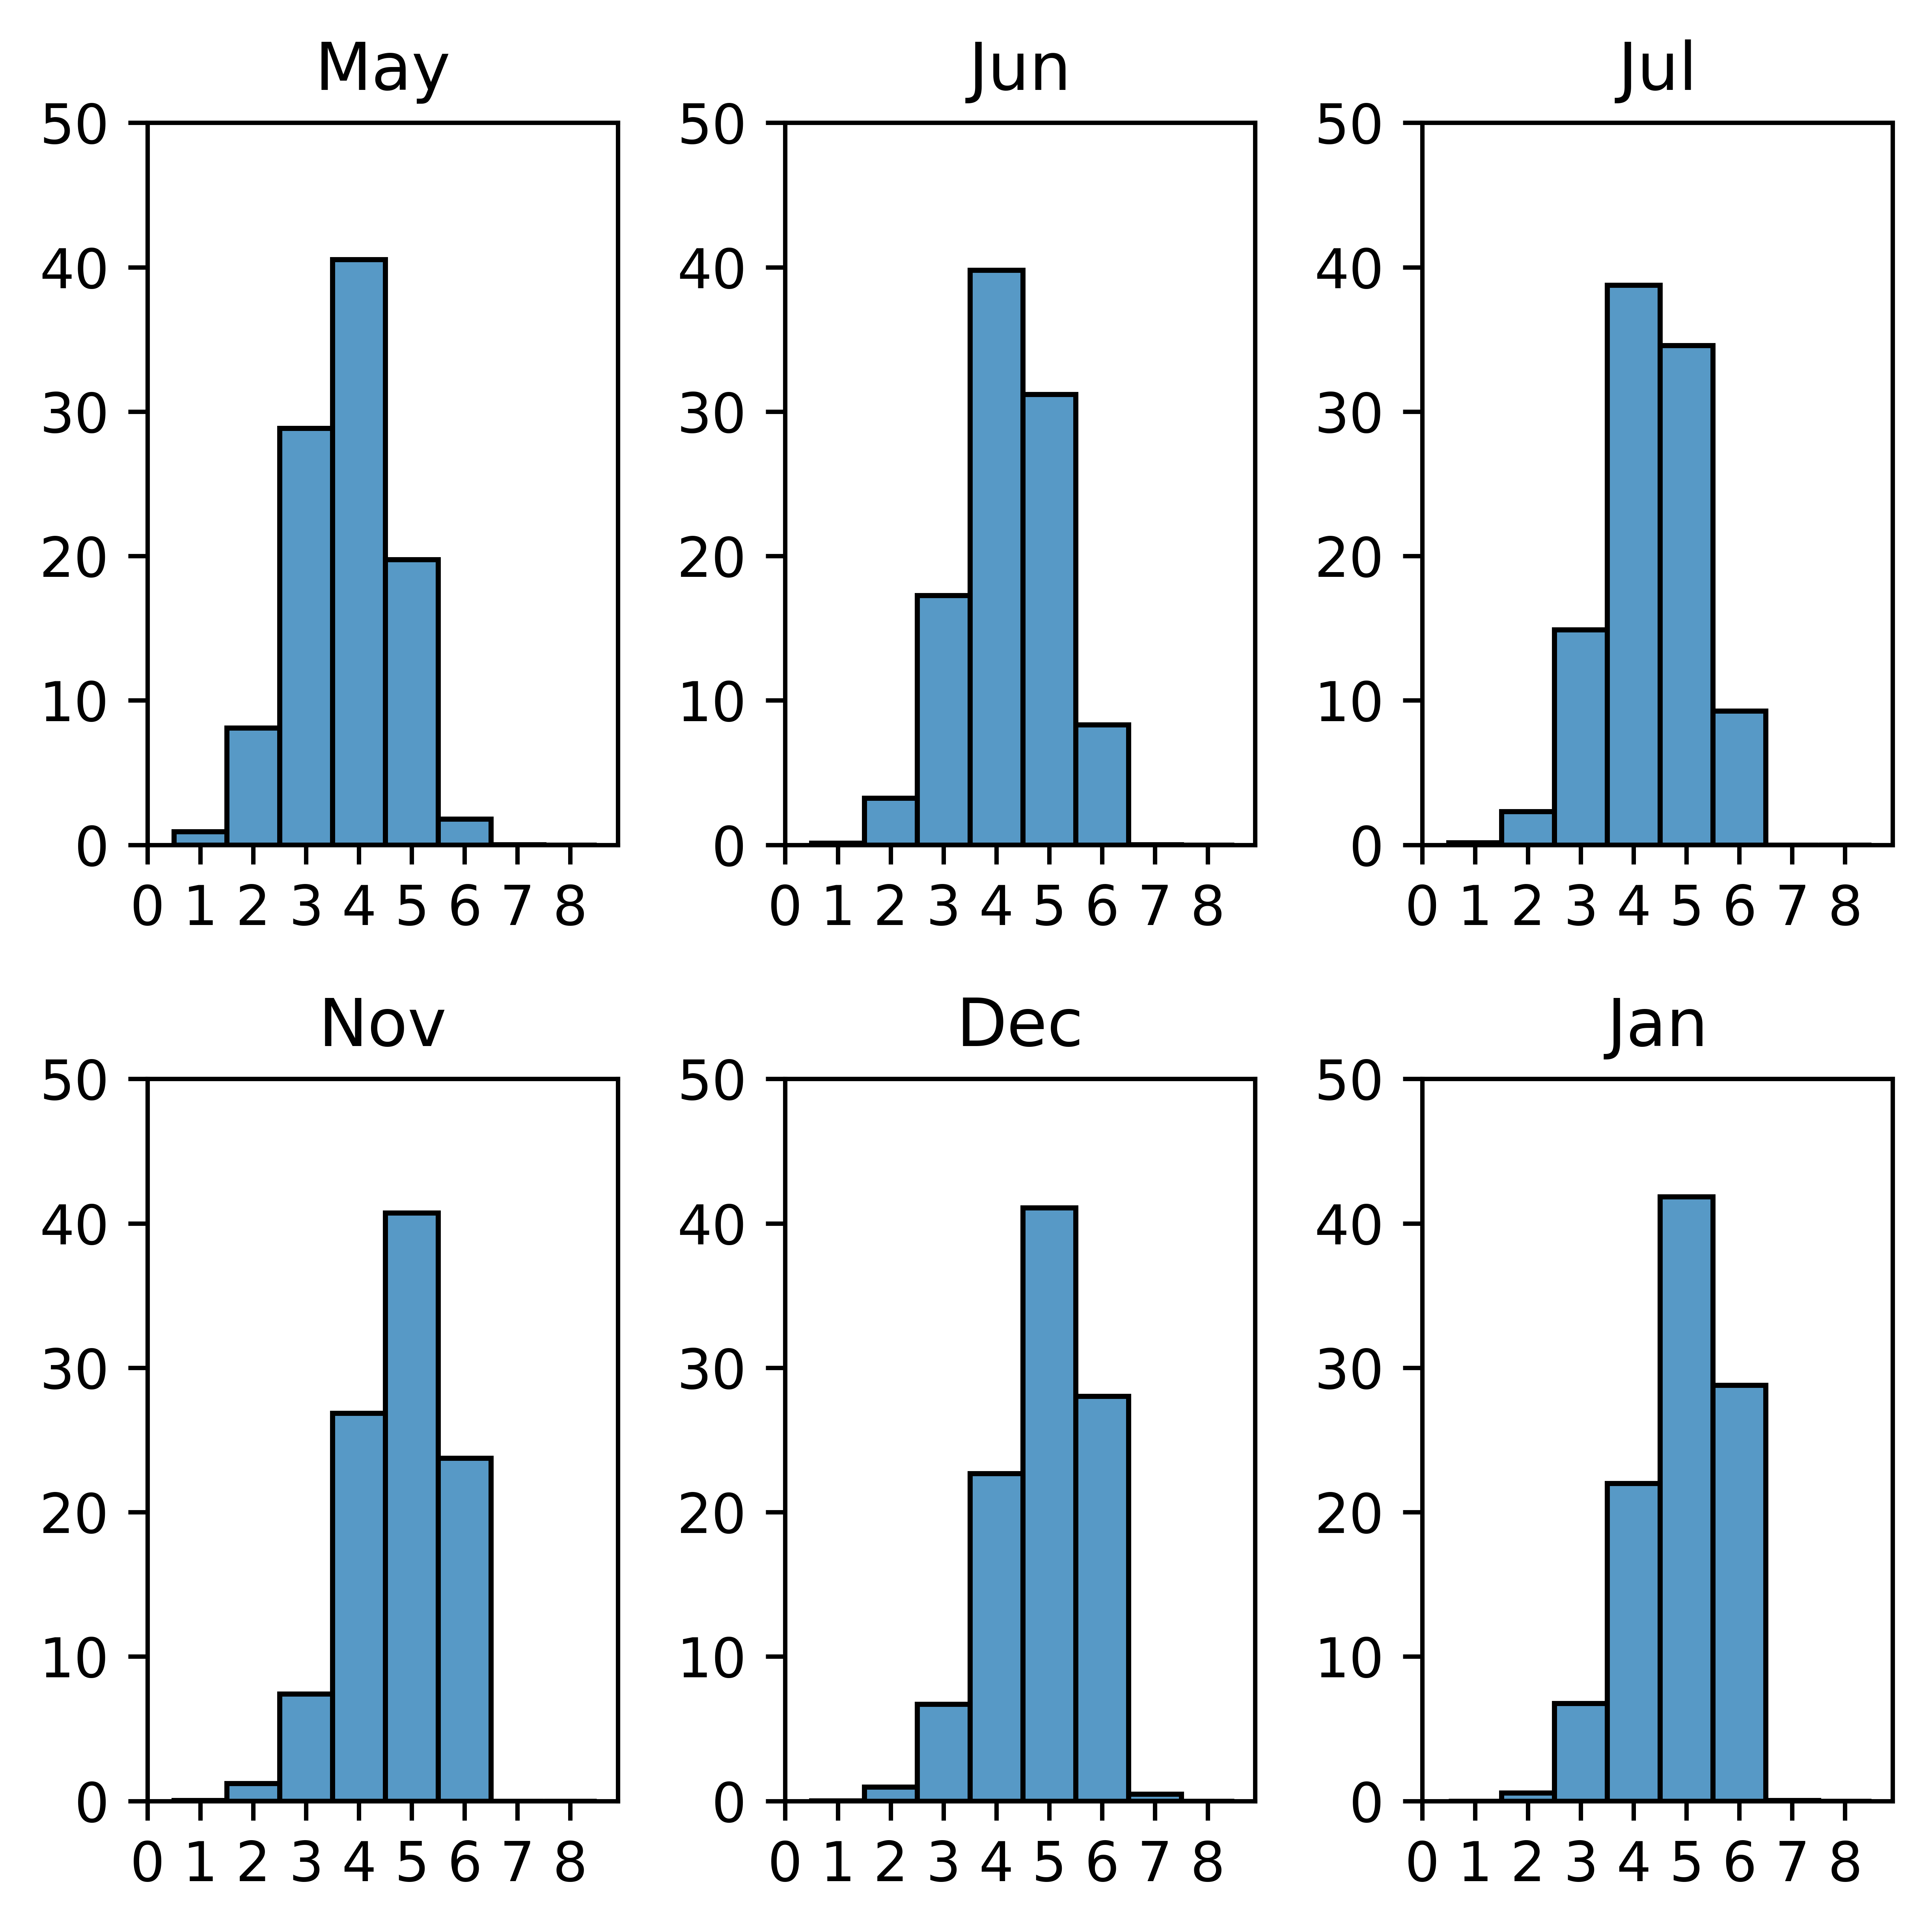

In [124]:
mpl.rc_file_defaults()
plt.rcParams['figure.dpi'] = 1000
#sns.set(style= 'darkgrid')
plt.figure(figsize= (5,5), layout= 'tight')
#bins= [1,2,3,4,5,6,7,8]

plt.subplot(2,3, 1)
g = sns.histplot(May.array, binrange= (1,8), stat= 'percent', discrete= True)
g.set_ylim(0,50)
g.set_xticks(range(9))
g.set_xticklabels([0,1,2,3,4,5,6,7,8])
plt.ylabel('')
plt.xlabel('')
plt.title('May')

plt.subplot(2,3, 2)
h = sns.histplot(Jun.array, binrange= (1,8), stat= 'percent', discrete= True)
h.set_ylim(0,50)
h.set_xticks(range(9))
h.set_xticklabels([0,1,2,3,4,5,6,7,8])
plt.ylabel('')
plt.xlabel('')
plt.title('Jun')

plt.subplot(2,3, 3)
j = sns.histplot(Jul.array, binrange= (1,8), stat= 'percent', discrete= True)
j.set_ylim(0,50)
j.set_xticks(range(9))
j.set_xticklabels([0,1,2,3,4,5,6,7,8])
plt.ylabel('')
plt.xlabel('')
plt.title('Jul')

plt.subplot(2,3, 4)
k = sns.histplot(Nov.array, binrange= (1,8), stat= 'percent', discrete= True)
k.set_ylim(0,50)
k.set_xticks(range(9))
k.set_xticklabels([0,1,2,3,4,5,6,7,8])
plt.ylabel('')
plt.xlabel('')
plt.title('Nov')

plt.subplot(2,3, 5)
l = sns.histplot(Dec.array, binrange= (1,8), stat= 'percent', discrete= True)
l.set_ylim(0,50)
l.set_xticks(range(9))
l.set_xticklabels([0,1,2,3,4,5,6,7,8])
plt.ylabel('')
plt.xlabel('')
plt.title('Dec')

plt.subplot(2,3, 6)
m = sns.histplot(Jan.array, binrange= (1,8), stat= 'percent', discrete= True)
m.set_ylim(0,50)
m.set_xticks(range(9))
m.set_xticklabels([0,1,2,3,4,5,6,7,8])
plt.ylabel('')
plt.xlabel('')
plt.title('Jan')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

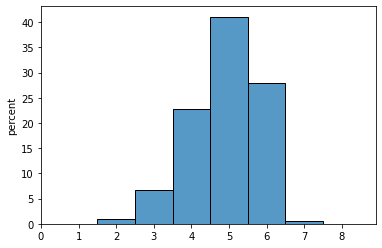

In [95]:
g = sns.histplot(Dec.array, binrange= (1,8), stat= 'percent', discrete= True)
g.set_xticks(range(9))
g.set_xticklabels([0,1,2,3,4,5,6,7,8])
plt.ylabel('')
plt.xlabel('')
plt.xticks()

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: Futu

Text(0.5, 0, '')

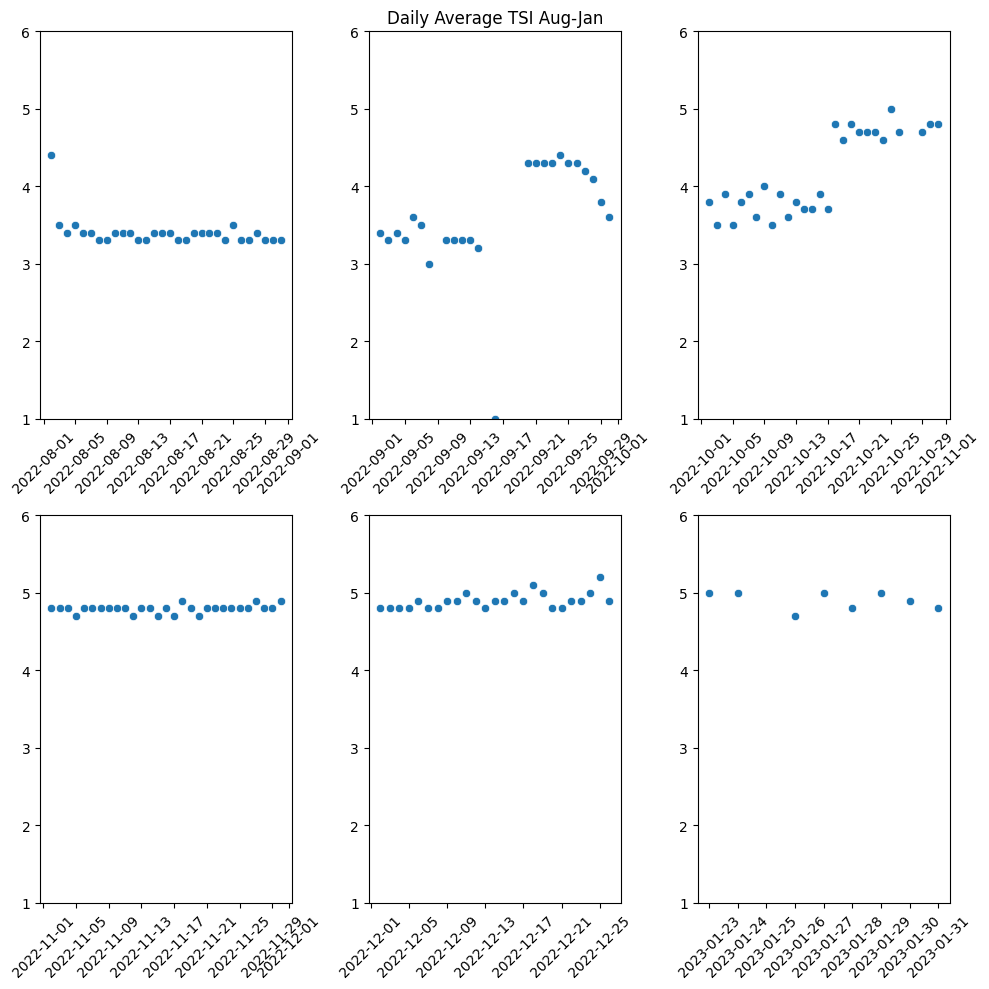

In [44]:
plt.figure(figsize= (10,10), layout='tight')
plt.subplot(2,3, 1)
sns.scatterplot(Aug.index ,Aug['Toxic Soup Index']).set_ylim(1,6)
plt.xticks(rotation= 45)
plt.ylabel('')
plt.xlabel('')

plt.subplot(2,3, 2)
sns.scatterplot(Sep.index ,Sep['Toxic Soup Index']).set_ylim(1,6)
plt.xticks(rotation= 45)
plt.ylabel('')
plt.xlabel('')
plt.title('Daily Average TSI Aug-Jan')
plt.subplot(2,3, 3)
sns.scatterplot(Oct.index ,Oct['Toxic Soup Index']).set_ylim(1,6)
plt.xticks(rotation= 45)
plt.ylabel('')
plt.xlabel('')

plt.subplot(2,3, 4)
sns.scatterplot(Nov.index ,Nov['Toxic Soup Index']).set_ylim(1,6)
plt.xticks(rotation= 45)
plt.ylabel('')
plt.xlabel('')

plt.subplot(2,3, 5)
sns.scatterplot(Dec.index ,Dec['Toxic Soup Index']).set_ylim(1,6)
plt.xticks(rotation= 45)
plt.ylabel('')
plt.xlabel('')

plt.subplot(2,3, 6)
sns.scatterplot(Jan.index ,Jan['Toxic Soup Index']).set_ylim(1,6)
plt.xticks(rotation= 45)
plt.ylabel('')
plt.xlabel('')


In [32]:
dfw = pd.DataFrame()

In [63]:
dfw

,Time,Speed,Direction
0,2022-02-01T00:00:00Z,1.0,232.2
1,2022-02-01T00:05:00Z,0.8,236.9
2,2022-02-01T00:10:00Z,0.7,348.7
3,2022-02-01T00:15:00Z,0.7,322.9
4,2022-02-01T00:20:00Z,0.5,213.0
...,...,...,...
105075,2023-01-31T23:40:00Z,1.9,318.9
105076,2023-01-31T23:45:00Z,2.0,316.5
105077,2023-01-31T23:50:00Z,1.9,319.6
105078,2023-01-31T23:55:00Z,2.0,322.9


In [64]:
dfw['DateTime'] = dfw['Time'].str.split('.').str[0]

dfw['DateTime'] = dfw['DateTime'].str.replace('T',' ')
dfw['DateTime'] = dfw['DateTime'].str.replace('Z','')


dfw = dfw.drop('Time', axis=1)
dfw.DateTime = pd.to_datetime(dfw.DateTime)
dfw

,Speed,Direction,DateTime
0,1.0,232.2,2022-02-01 00:00:00
1,0.8,236.9,2022-02-01 00:05:00
2,0.7,348.7,2022-02-01 00:10:00
3,0.7,322.9,2022-02-01 00:15:00
4,0.5,213.0,2022-02-01 00:20:00
...,...,...,...
105075,1.9,318.9,2023-01-31 23:40:00
105076,2.0,316.5,2023-01-31 23:45:00
105077,1.9,319.6,2023-01-31 23:50:00
105078,2.0,322.9,2023-01-31 23:55:00


In [76]:
Fdfw = dfw.loc[(dfw['Direction'] >= 314) & (dfw['Direction'] <= 339)]
dfow = dfw.loc[(dfw['Direction'] <= 313) | (dfw['Direction'] >= 340)]
Fdfw

,Speed,Direction,DateTime
3,0.7,322.9,2022-02-01 00:15:00
28,1.6,336.0,2022-02-01 02:20:00
30,1.3,320.9,2022-02-01 02:30:00
40,0.6,319.3,2022-02-01 03:20:00
43,1.4,331.8,2022-02-01 03:35:00
...,...,...,...
105074,2.0,327.2,2023-01-31 23:35:00
105075,1.9,318.9,2023-01-31 23:40:00
105076,2.0,316.5,2023-01-31 23:45:00
105077,1.9,319.6,2023-01-31 23:50:00


In [77]:
dfow

,Speed,Direction,DateTime
0,1.0,232.2,2022-02-01 00:00:00
1,0.8,236.9,2022-02-01 00:05:00
2,0.7,348.7,2022-02-01 00:10:00
4,0.5,213.0,2022-02-01 00:20:00
5,0.3,126.9,2022-02-01 00:25:00
...,...,...,...
105058,1.8,310.7,2023-01-31 22:15:00
105068,1.6,309.5,2023-01-31 23:05:00
105069,1.6,301.6,2023-01-31 23:10:00
105070,2.2,308.1,2023-01-31 23:15:00


In [78]:
Fdf = pd.merge(SDF, Fdfw, left_on= 'DateTime', right_on='DateTime')
Fdf2 = pd.merge(SDF, dfow, left_on= 'DateTime', right_on='DateTime')
Fdf

,Toxic Soup Index,DateTime,Speed,Direction
0,3,2022-02-01 00:15:00,0.7,322.9
1,5,2022-02-01 02:20:00,1.6,336.0
2,3,2022-02-01 02:30:00,1.3,320.9
3,4,2022-02-01 03:20:00,0.6,319.3
4,4,2022-02-01 03:35:00,1.4,331.8
...,...,...,...,...
11823,6,2023-01-30 23:20:00,0.5,316.3
11824,6,2023-01-30 23:30:00,0.7,325.2
11825,6,2023-01-30 23:40:00,1.7,327.0
11826,6,2023-01-30 23:50:00,1.7,318.7


In [79]:
Fdf2

,Toxic Soup Index,DateTime,Speed,Direction
0,4,2022-02-01 00:00:00,1.0,232.2
1,3,2022-02-01 00:05:00,0.8,236.9
2,5,2022-02-01 00:10:00,0.7,348.7
3,6,2022-02-01 00:20:00,0.5,213.0
4,5,2022-02-01 00:25:00,0.3,126.9
...,...,...,...,...
77592,6,2023-01-30 22:25:00,1.1,347.3
77593,6,2023-01-30 23:05:00,0.9,300.9
77594,6,2023-01-30 23:25:00,1.8,280.4
77595,6,2023-01-30 23:35:00,1.7,304.8


In [ ]:
Fdf.index = pd.to_datetime(Fdf['DateTime'])
Fdf = Fdf.resample('1440T', label= 'left',closed='left').mean().round(1)
Fdf

In [ ]:
Fdf2.index = pd.to_datetime(Fdf2['DateTime'])
Fdf2 = Fdf2.resample('1440T', label= 'left',closed='left').mean().round(1)
Fdf2

In [90]:
Fdf2.describe() , Fdf.describe()

(       Toxic Soup Index       Speed   Direction
 count        328.000000  328.000000  328.000000
 mean           4.621951    1.922256  183.660671
 std            0.714340    1.275370   59.968188
 min            1.000000    0.500000   20.500000
 25%            4.000000    1.400000  142.200000
 50%            4.600000    1.800000  184.750000
 75%            5.100000    2.200000  232.650000
 max            6.100000   18.500000  299.500000,
        Toxic Soup Index       Speed   Direction
 count        314.000000  314.000000  314.000000
 mean           4.607325    1.459873  324.741720
 std            0.756216    0.508881    2.944591
 min            2.000000    0.300000  314.500000
 25%            4.100000    1.100000  322.700000
 50%            4.600000    1.400000  324.850000
 75%            5.100000    1.800000  326.800000
 max            7.000000    3.000000  334.900000)

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


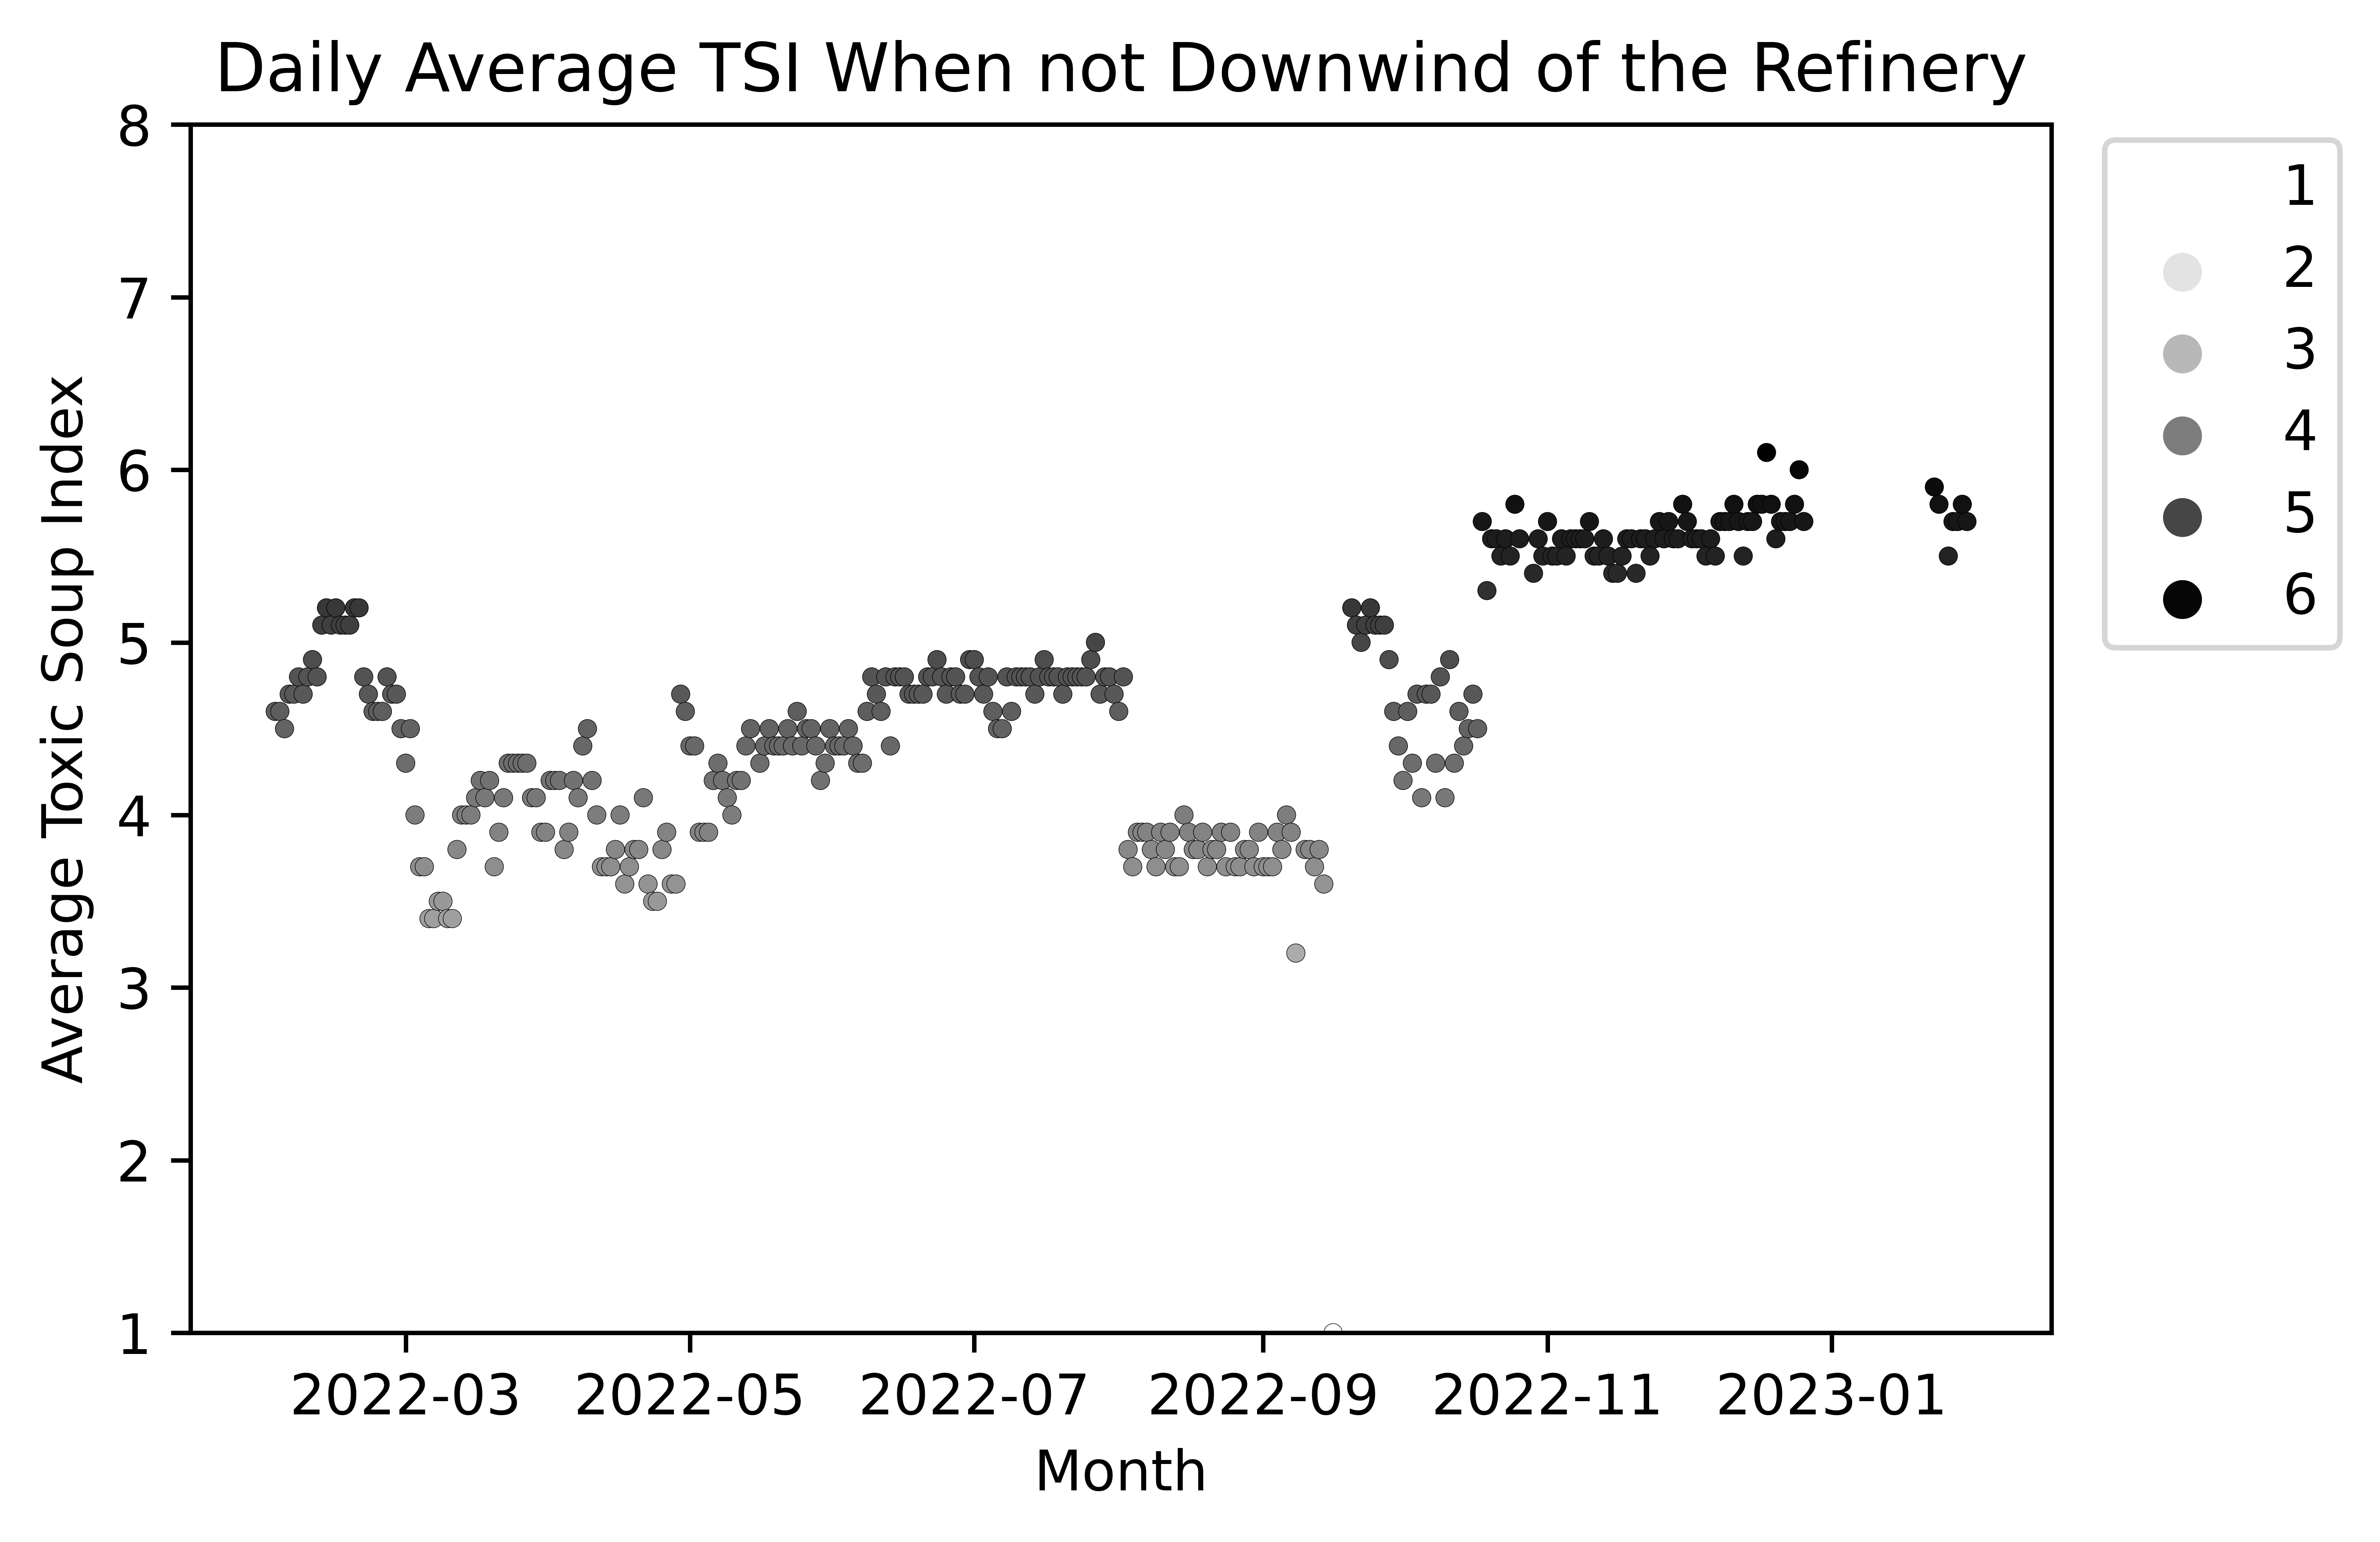

In [87]:
#Plot for TSI downwind of refinery

#palette = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)
x= Fdf2.index
y= Fdf2['Toxic Soup Index']
#plt.scatter(x= x, y=y, s= 5)
plt.rcParams["figure.dpi"] = 1000
plt.title('Daily Average TSI When not Downwind of the Refinery')
plt.xlabel('Month')
plt.ylabel('Average Toxic Soup Index')
plt.ylim(ymin = 1, ymax = 8)
sns.scatterplot(x, y, hue=y, palette= 'Greys', edgecolor= 'Black', linewidth= .1, s=11)
plt.legend(loc='upper right', bbox_to_anchor=(1.17, 1.01))

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


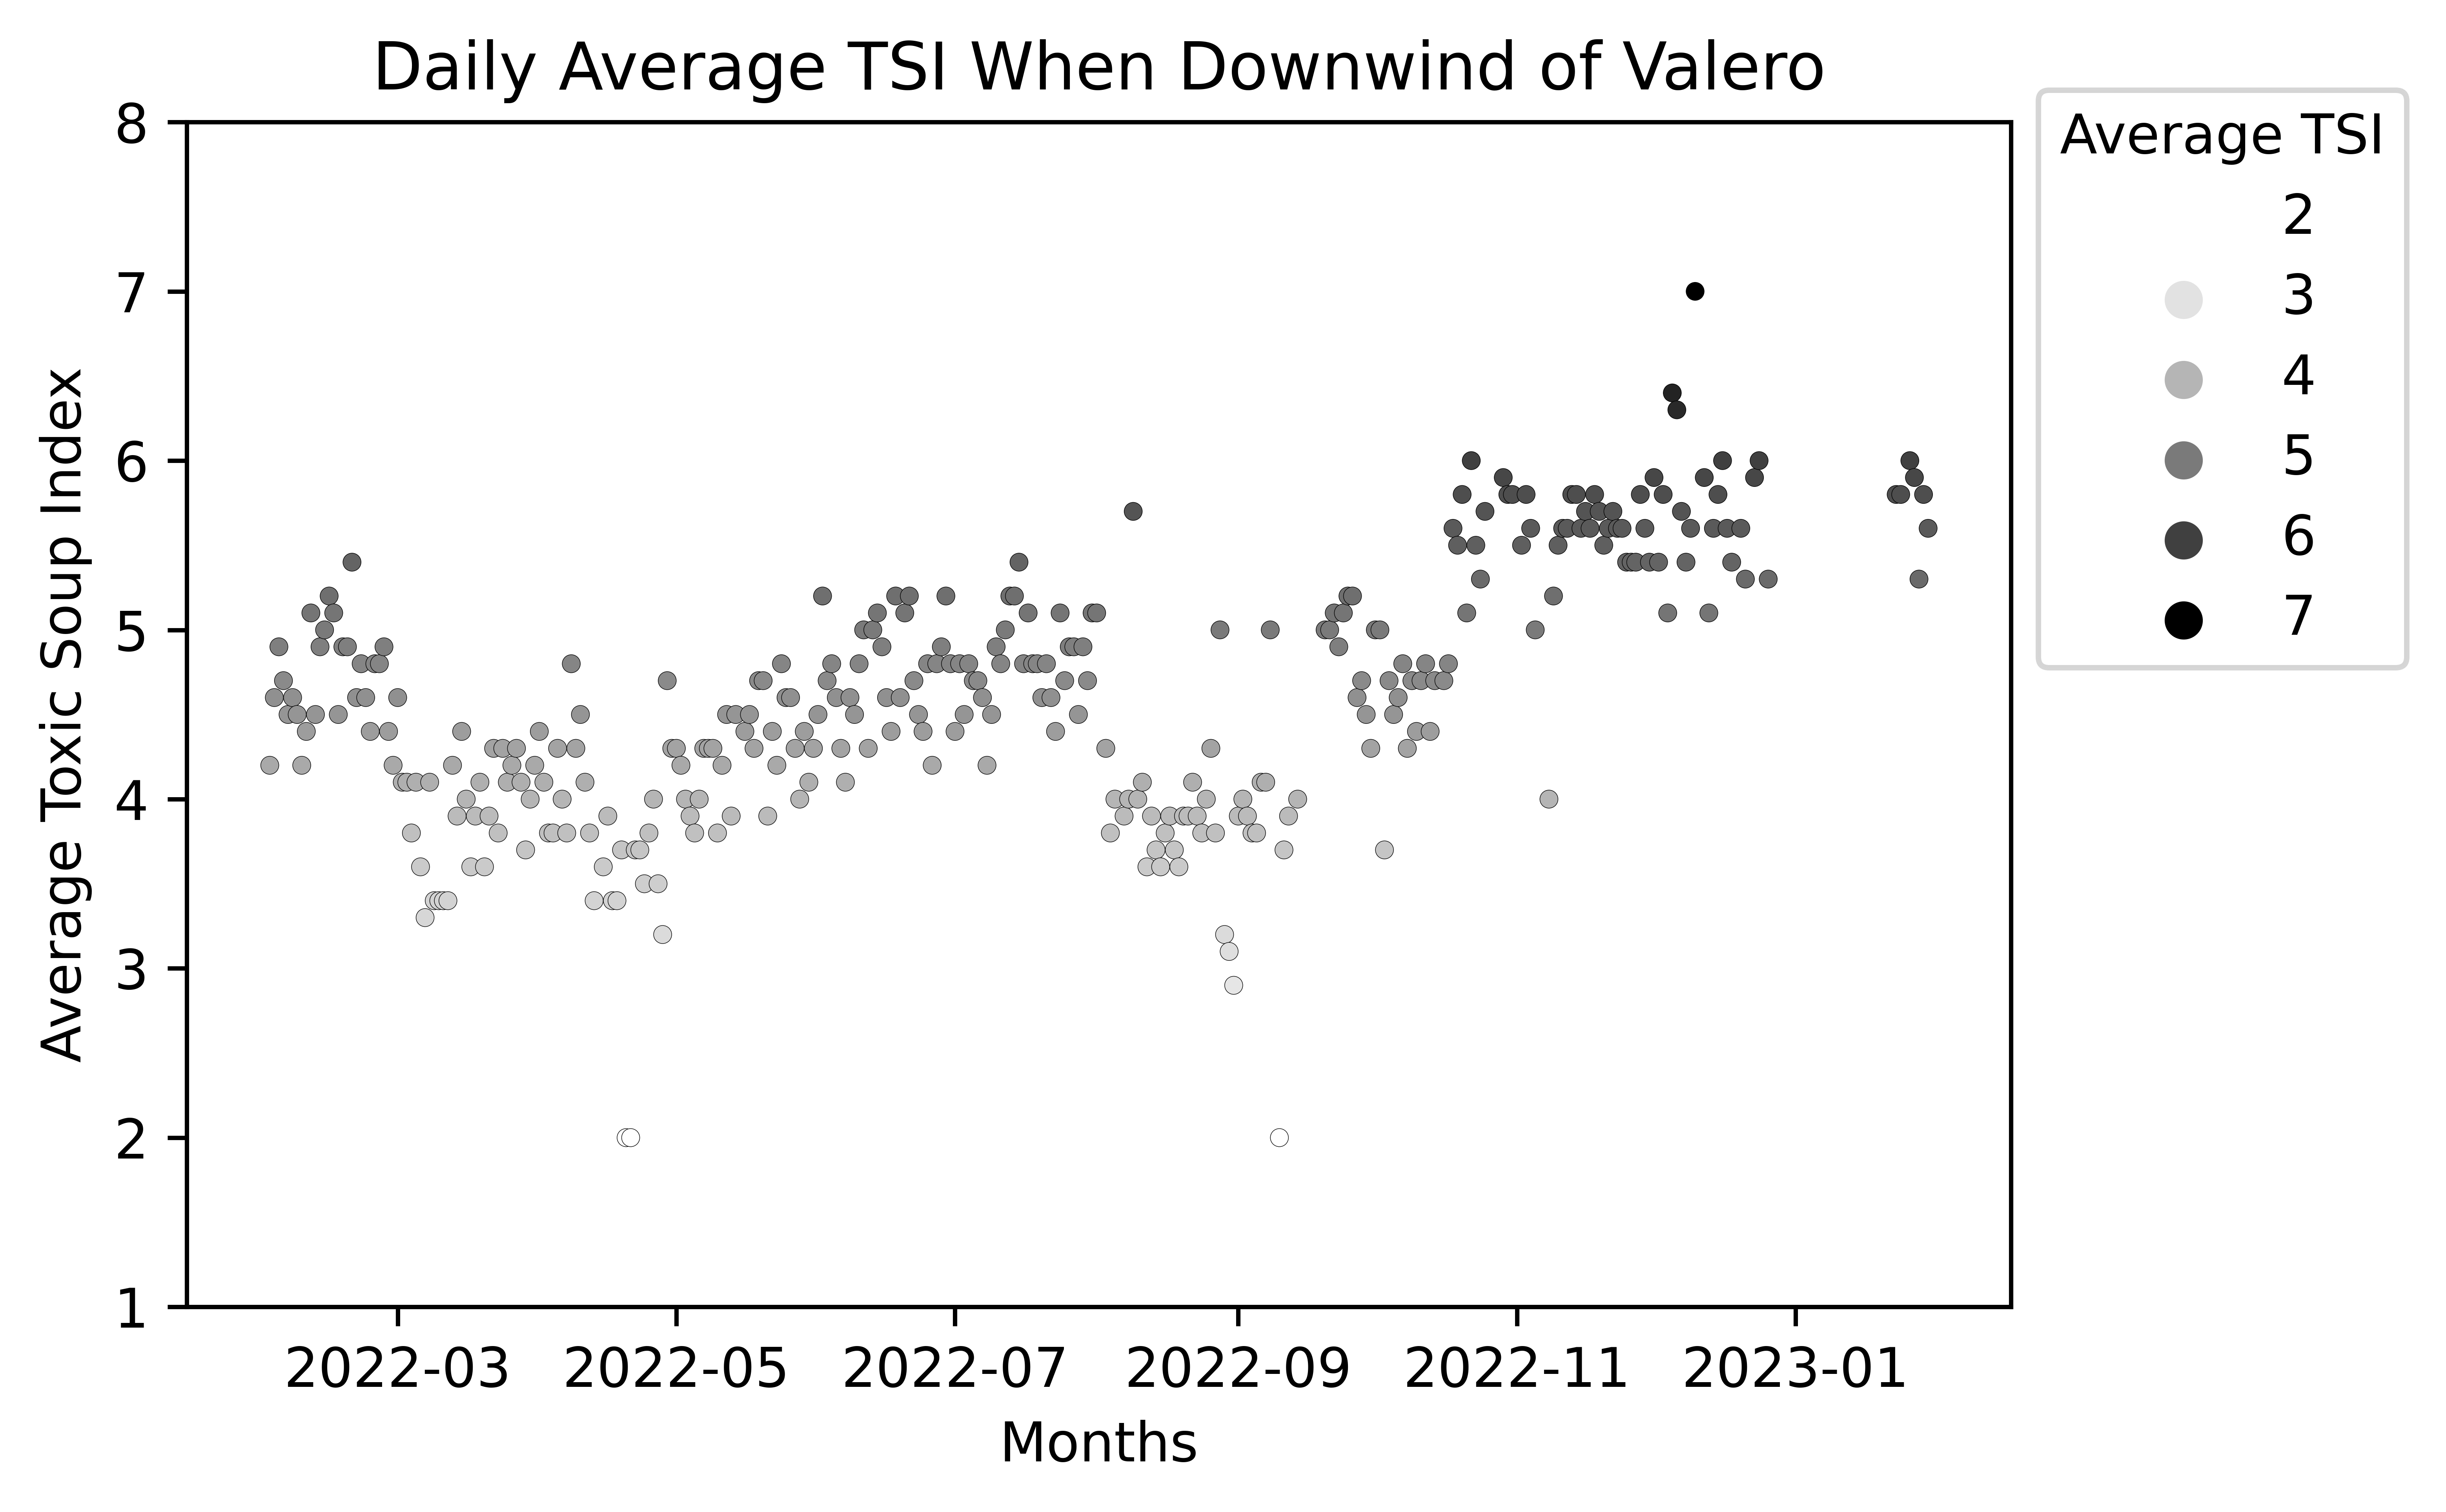

In [88]:
palette = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)
plt.rcParams["figure.dpi"] = 1000
x= Fdf.index
y= Fdf['Toxic Soup Index']
#plt.scatter(x= x, y=y, s= 5)
plt.title('Daily Average TSI When Downwind of Valero')
plt.xlabel('Months')
plt.ylabel('Average Toxic Soup Index')
plt.ylim(ymax= 8, ymin= 1)
sns.scatterplot(x, y, hue=y, palette= 'Greys', edgecolor= 'Black', linewidth= .1, s=11)
plt.legend(loc= 0, bbox_to_anchor=(1, 1.05), title= 'Average TSI')

In [ ]:
df.index = pd.to_datetime(df['DateTime'])
df = df.resample('1440T', label= 'left',closed='left').mean().round(1)
df

In [ ]:
#Plot for entire year TSI

x= df.index
y= df['Toxic Soup Index']
#plt.scatter(x= x, y=y, s= 5)
plt.title('Daily Average TSI in Benicia')
plt.xlabel('Months')
plt.ylabel('Average Toxic Soup Index')
sns.scatterplot(x, y, hue=y, palette= 'Greys', edgecolor= 'Black', linewidth= .1, s=11)
plt.legend(loc= 0, bbox_to_anchor=(1, 1.05), title= 'Average TSI')

In [251]:
SDF = SDF.squeeze()

In [258]:

calplot.calplot(SDF, cmap='Blues')
plt.title('Daily Average TSI Across 2022', loc= 'left')

Text(0.0, 1.0, 'Daily Average TSI Across 2022')

Text(0.5, 0, 'Toxic Soup Index')

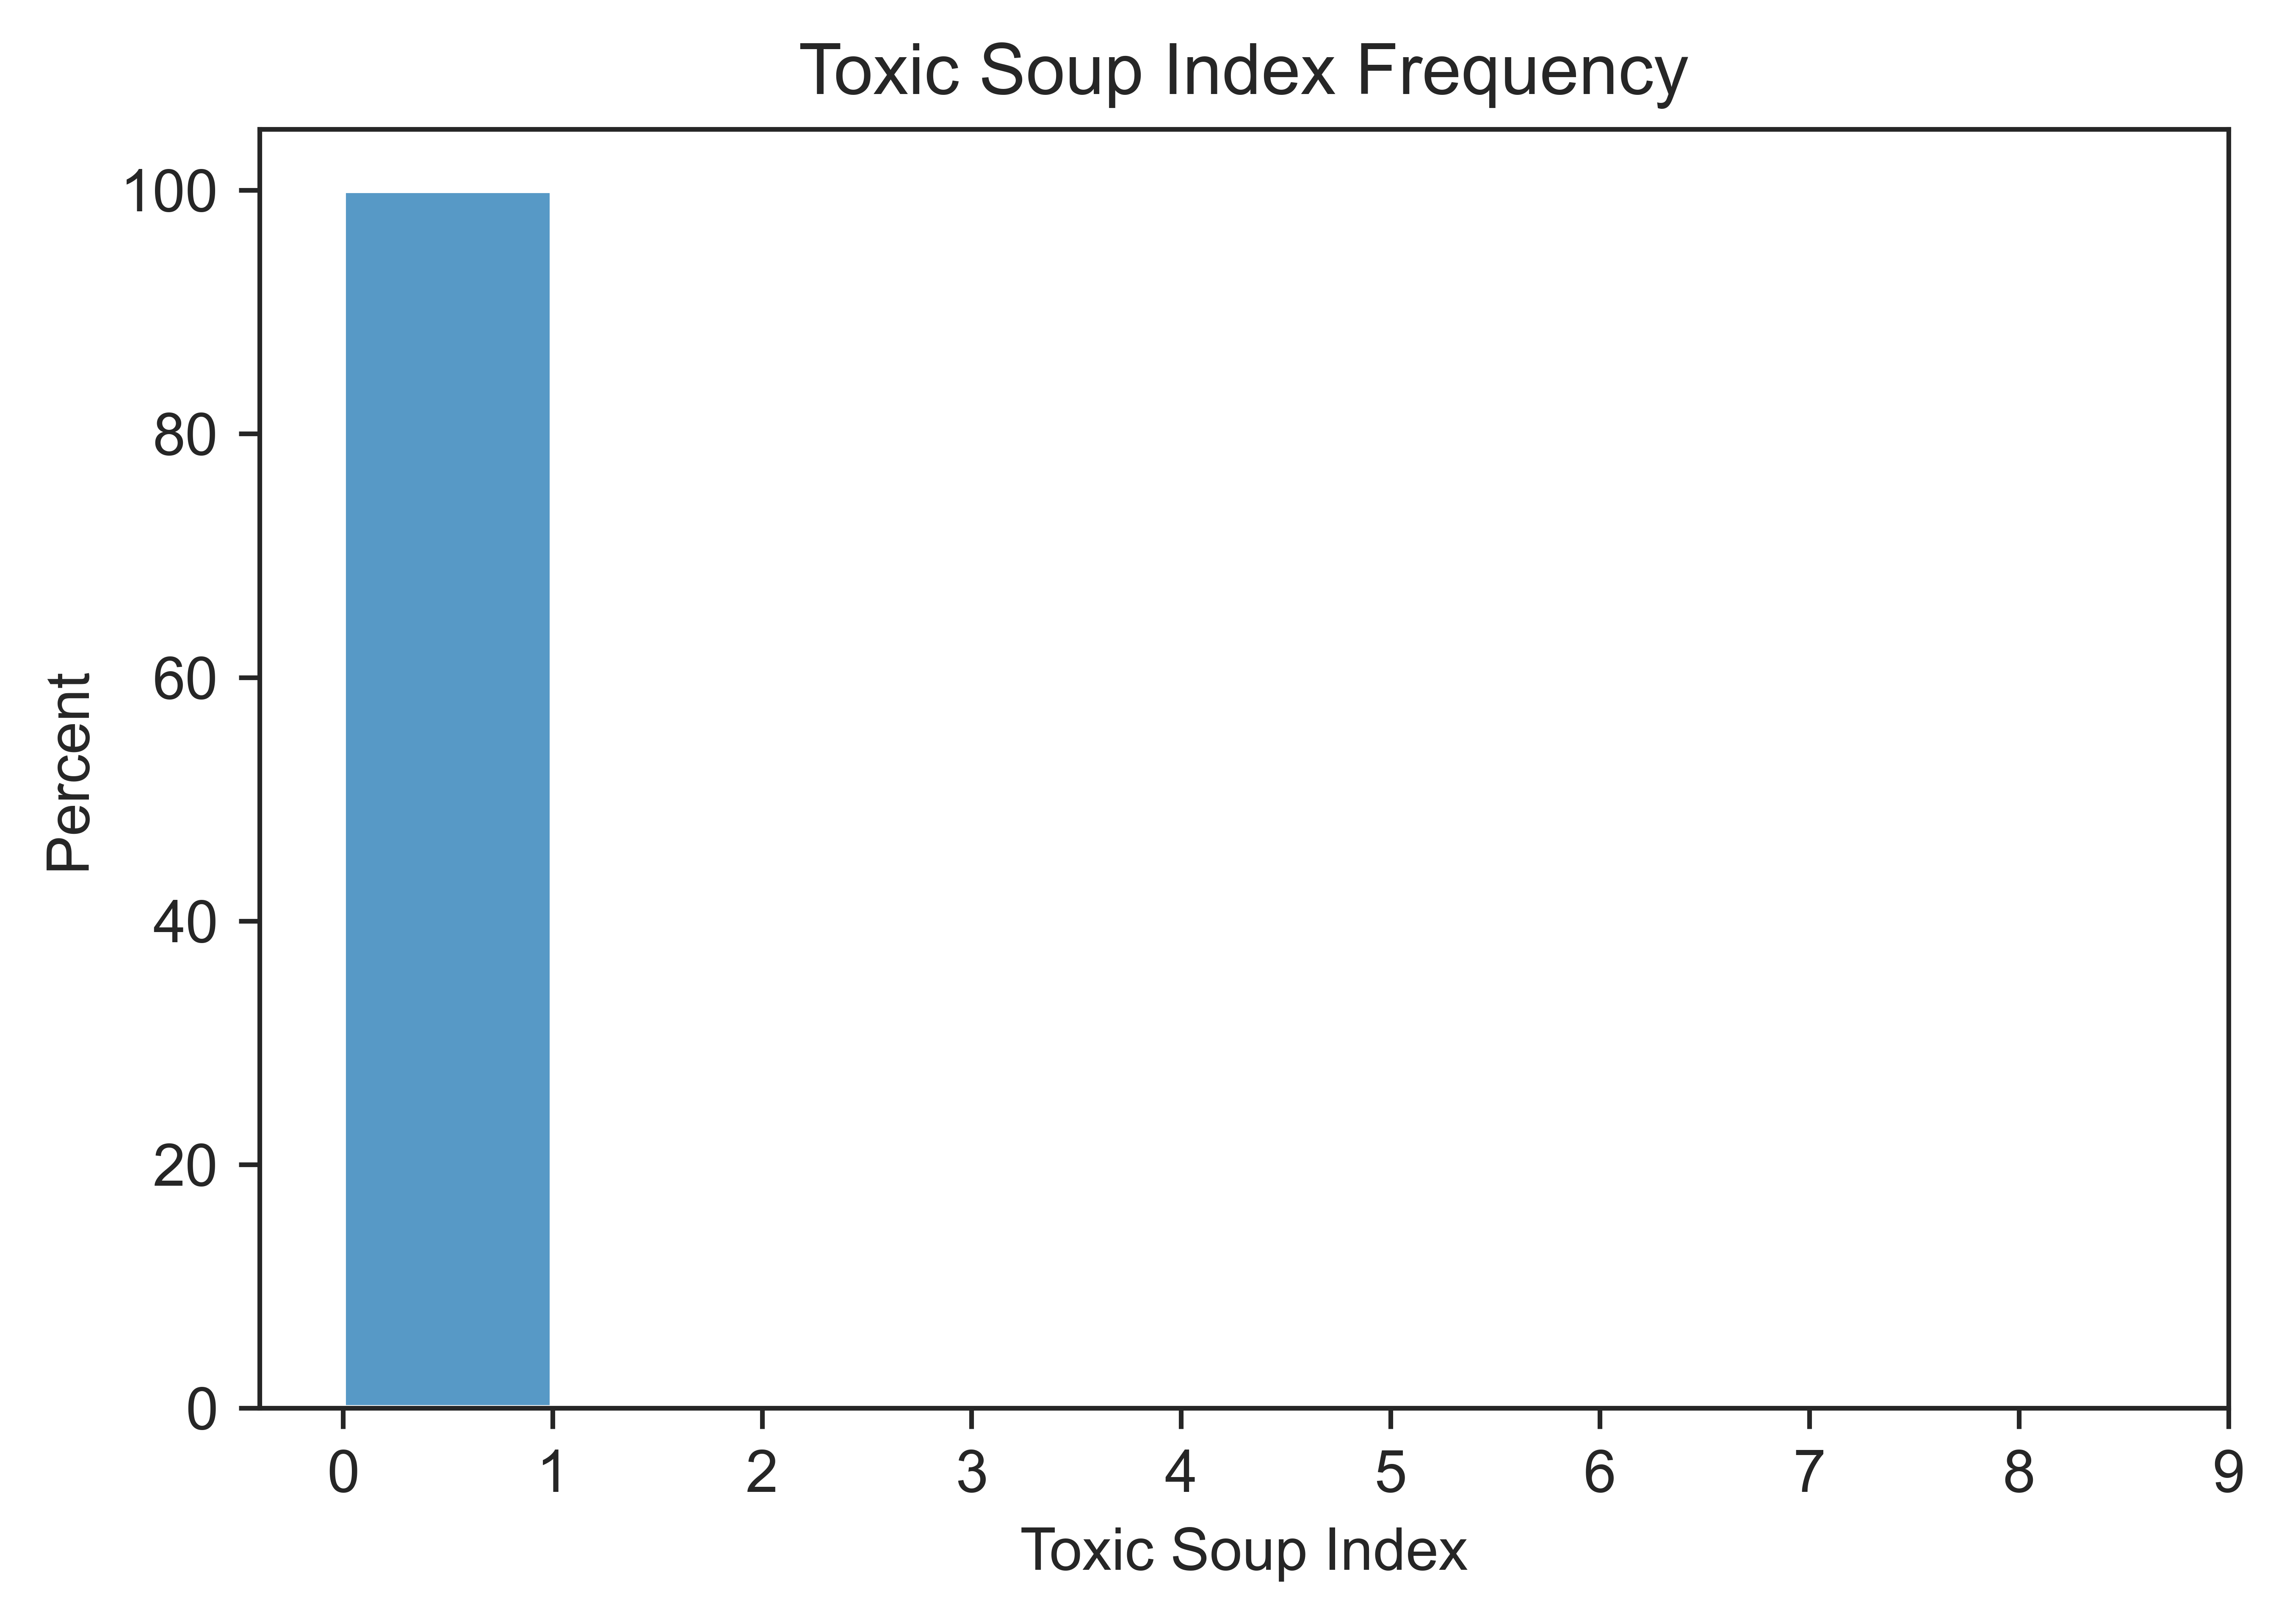

In [60]:
plt.rcParams['figure.dpi'] = 1000
sns.set_style('ticks')
p = sns.histplot(data=df['O3'], binwidth=1, binrange=(0,8), stat='percent', legend= None, kde= False, element='bars')
p.set_xticks(range(10))
p.set_title("Toxic Soup Index Frequency")
p.set_xlabel('Toxic Soup Index')
#for x in range(len(SDF)):
   # plt.text(i, y[i], y[i], ha='center')




In [61]:
#Aggregated Palette

palette = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)

In [62]:
sns.scatterplot(x=df.index, y= df['Toxic Soup Index'] ,data=df, edgecolor= 'black', s= 20, hue=SDF['Toxic Soup Index'], palette='Greys')
plt.rcParams['figure.dpi'] = 750

plt.title('Toxic Soup Index Each Day 01/12/22 - 06/26/22')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.ylabel('Number of pollutants observed')
plt.legend(title='TSI', loc='upper right', bbox_to_anchor=(1, 0, .18, 1))
plt.gcf().autofmt_xdate()

ValueError: array length 366 does not match index length 90783